<h3> Problem Statement: Concrete Strength Prediction </h3>

<h5>Objective:</h5>

<p>To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.</p>

<h5>Resources Available: </h5>

<p>The data for this project is available in file <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive">https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive</a>. The same has been shared along with the course content.</p>

<h5>Attribute Information:</h5>
<p>Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.</p>

<table>
    <thead>
        <th></th>
        <th>Name</th>
        <th>Data Type</th>
        <th>Measurement</th>
        <th>Description</th>
    </thead>
    <tbody>
        <tr>
            <td>1.</td>
            <td>Cement (cement)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>2.</td>
            <td>Blast Furnace Slag (slag)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
             <td>Input Variable</td>
        </tr>
         <tr>
            <td>3.</td>
            <td>Fly Ash (ash)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>4.</td>
            <td>Water(water)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
             <td>Input Variable</td>
        </tr>
         <tr>
            <td>5.</td>
            <td>Superplasticizer (superplastic)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>6.</td>
            <td>Coarse Aggregate (coarseagg)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>7.</td>
            <td>Fine Aggregate (fineagg)</td>
            <td>quantitative</td>
            <td>kg in a m3 mixture</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>8.</td>
            <td>Age(age)</td>
            <td>quantitative</td>
            <td>Day (1~365)</td>
            <td>Input Variable</td>
        </tr>
         <tr>
            <td>9.</td>
            <td>Concrete compressive strength(strength)</td>
            <td>quantitative</td>
            <td>MPa</td>
            <td>Output Variable</td>
        </tr>
    </tbody>
   </table>

In [1]:
# Importing required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform
import pickle

In [2]:
# reading the data from csv and viewing the head records
concrete_df = pd.read_csv('concrete.csv')
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Insights:

`The data has no categorical features`

`The data has features with value 0`

In [3]:
# viewing the dataframe shape
concrete_df.shape

(1030, 9)

### Insights:

`The data has 1030 rows with 9 columns`

In [4]:
# find the data types columns
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

### Insights:

`Age column has integer values where as rest of the columns are float`

In [5]:
# Looking for statistical summary like mean, median, range, skewness and inter quantile range

summary_df = concrete_df.describe().transpose()
summary_df['range'] = summary_df['max'] - summary_df['min']
summary_df['skeness'] = concrete_df.skew()
summary_df['median'] = concrete_df.median()
summary_df['IQR'] = concrete_df.quantile(0.75) - concrete_df.quantile(0.25)
summary_df

,count,mean,std,min,25%,50%,75%,max,range,skeness,median,IQR
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,438.00,0.509481,272.900,157.625
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,359.40,0.800717,22.000,142.950
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,200.10,0.537354,0.000,118.300
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,125.20,0.074628,185.000,27.100
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,32.20,0.907203,6.400,10.200
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,344.00,-0.040220,968.000,97.400
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,398.60,-0.253010,779.500,93.050
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,364.00,3.269177,28.000,49.000
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,80.27,0.416977,34.445,22.425


### Insights:

1. slag, ash and superplatic features have minimum value as 0
2. It looks like age has right skewed data

In [6]:
# check for null data 

concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Insights:

1. There are no null/missing values in the data

In [7]:
#Identifying outliers
IQR = summary_df['IQR']
Q1 = concrete_df.quantile(0.25)
Q3 = concrete_df.quantile(0.75)

((concrete_df< Q1 - 1.5 * IQR) | (concrete_df > Q3 + 1.5* IQR)).sum()

cement           0
slag             2
ash              0
water            9
superplastic    10
coarseagg        0
fineagg          5
age             59
strength         4
dtype: int64

### Insights:

`age has highest number of outliers`

`we have outliers in target variable as well`

In [8]:
# Check for duplicate rows
concrete_df.duplicated().sum()

25

### Insights

`We have 25 duplicate records`

In [9]:
# Remove the duplicate rows
concrete_df.drop_duplicates(inplace=True)

In [10]:
# Checking for columns with 0 value
concrete_df[concrete_df==0].count()

cement            0
slag            470
ash             541
water             0
superplastic    378
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

### Insights

`There are 470 rows with slag value as 0, 541 rows with ash value as 0 and 378 rows with superplastic as 0. We cannot consider these rows as null/missing values, as we can have concrete without adding these substances. Hence these are valid rows`

# Univariate Analysis

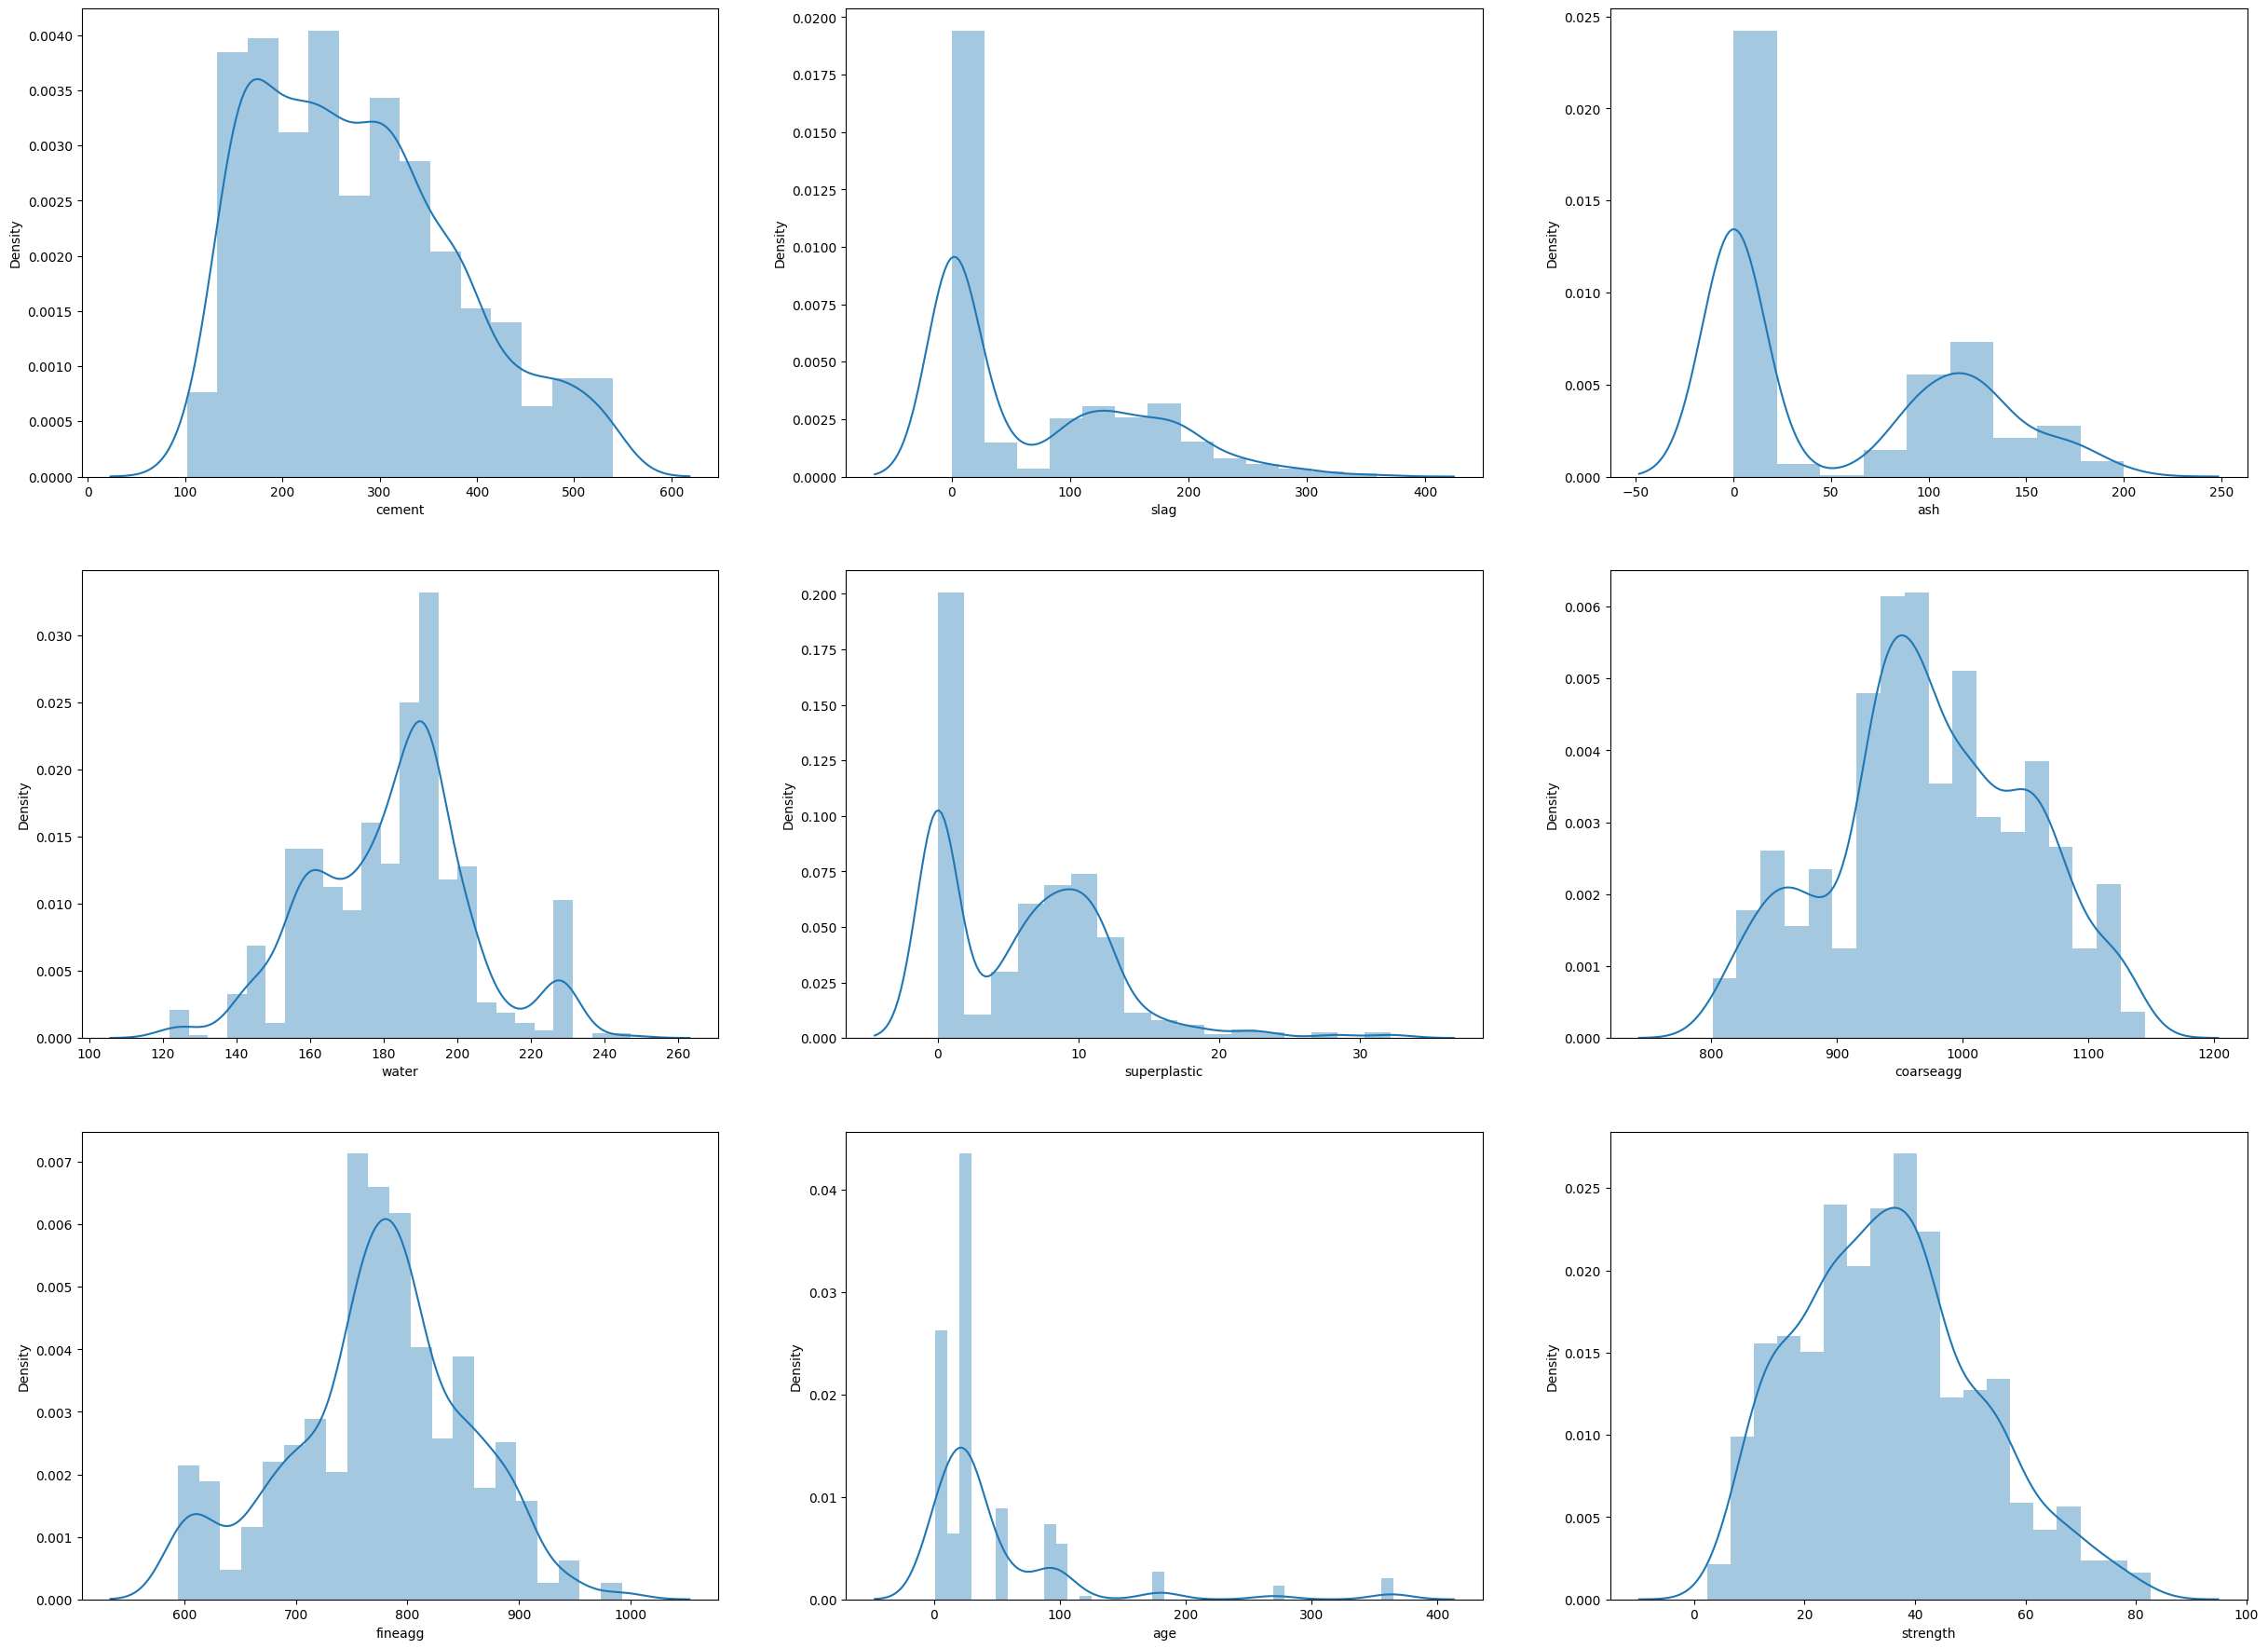

In [11]:
# Plot distribution plots for each column
def plot_univariate_graphs(df):
    plt.figure(figsize=(30,30))
    count=1
    for col in df.columns:
        plt.subplot(4,3,count)
        sns.distplot(df[col], kde=True)
        count+=1
    plt.show()
    
plot_univariate_graphs(concrete_df)

### Insights:

1. slag, ash, superplastic distributions have more than one gaussians
2. age distribution is very right skewed
3. water, cement, coarseagg and fineagg seems fairly normally distributed
4. strength is normally distributed

# Bivariate Analysis

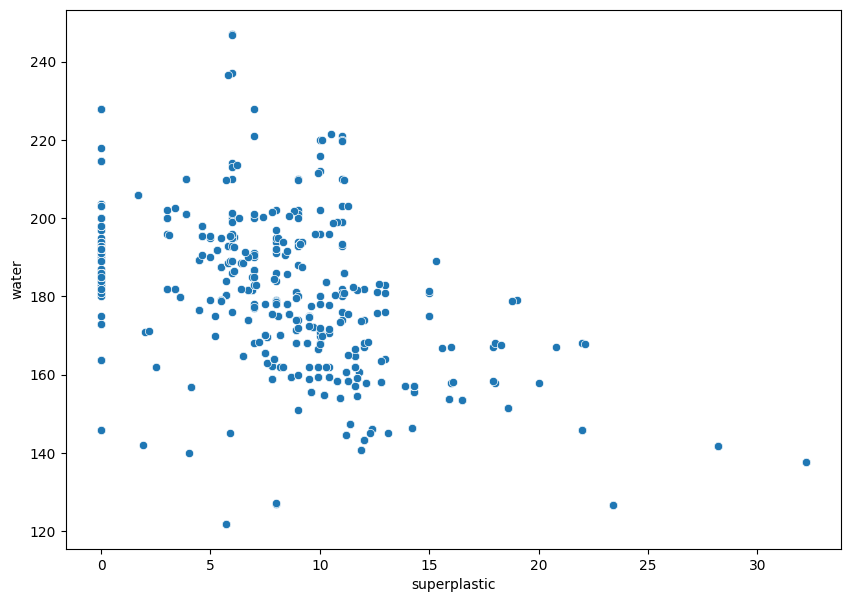

In [12]:
# Plot scatter plot between superplastic and water
plt.figure(figsize=(10,7))
sns.scatterplot(x='superplastic', y='water',data=concrete_df)
plt.show()

### Insights:

1. As the content of superplastic increases, amount of water decreases

### Insights:

1. As cement increases the concrete strength increases
2. As superplastic increases the concrete strength seems to increase as well
3. Other than cement and superplastic, there is no linear relationship between the strength and the features

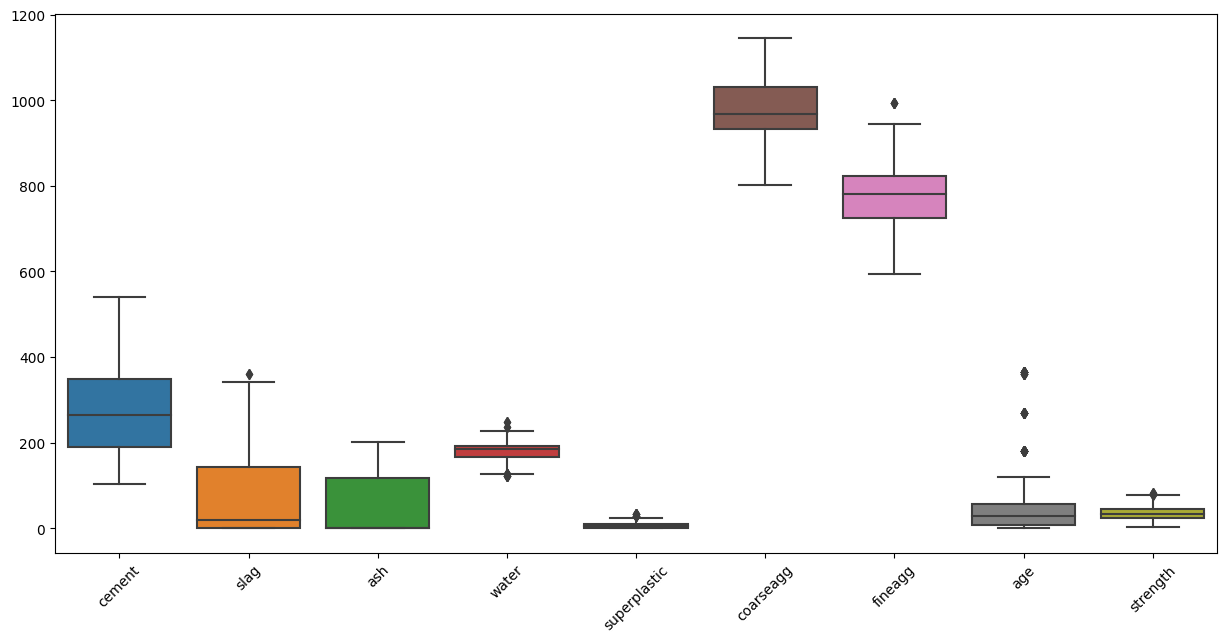

In [13]:
# plot boxplots on the entire dataset

plt.figure(figsize=(15, 7))
sns.boxplot(data=concrete_df)
plt.xticks(rotation=45)
plt.show()

### Insights:

1. Age has more number of outliers
2. slag, water, superplastic, fineagg and strength has some outliers
3. There are no outliers in cement, ash, coarseagg

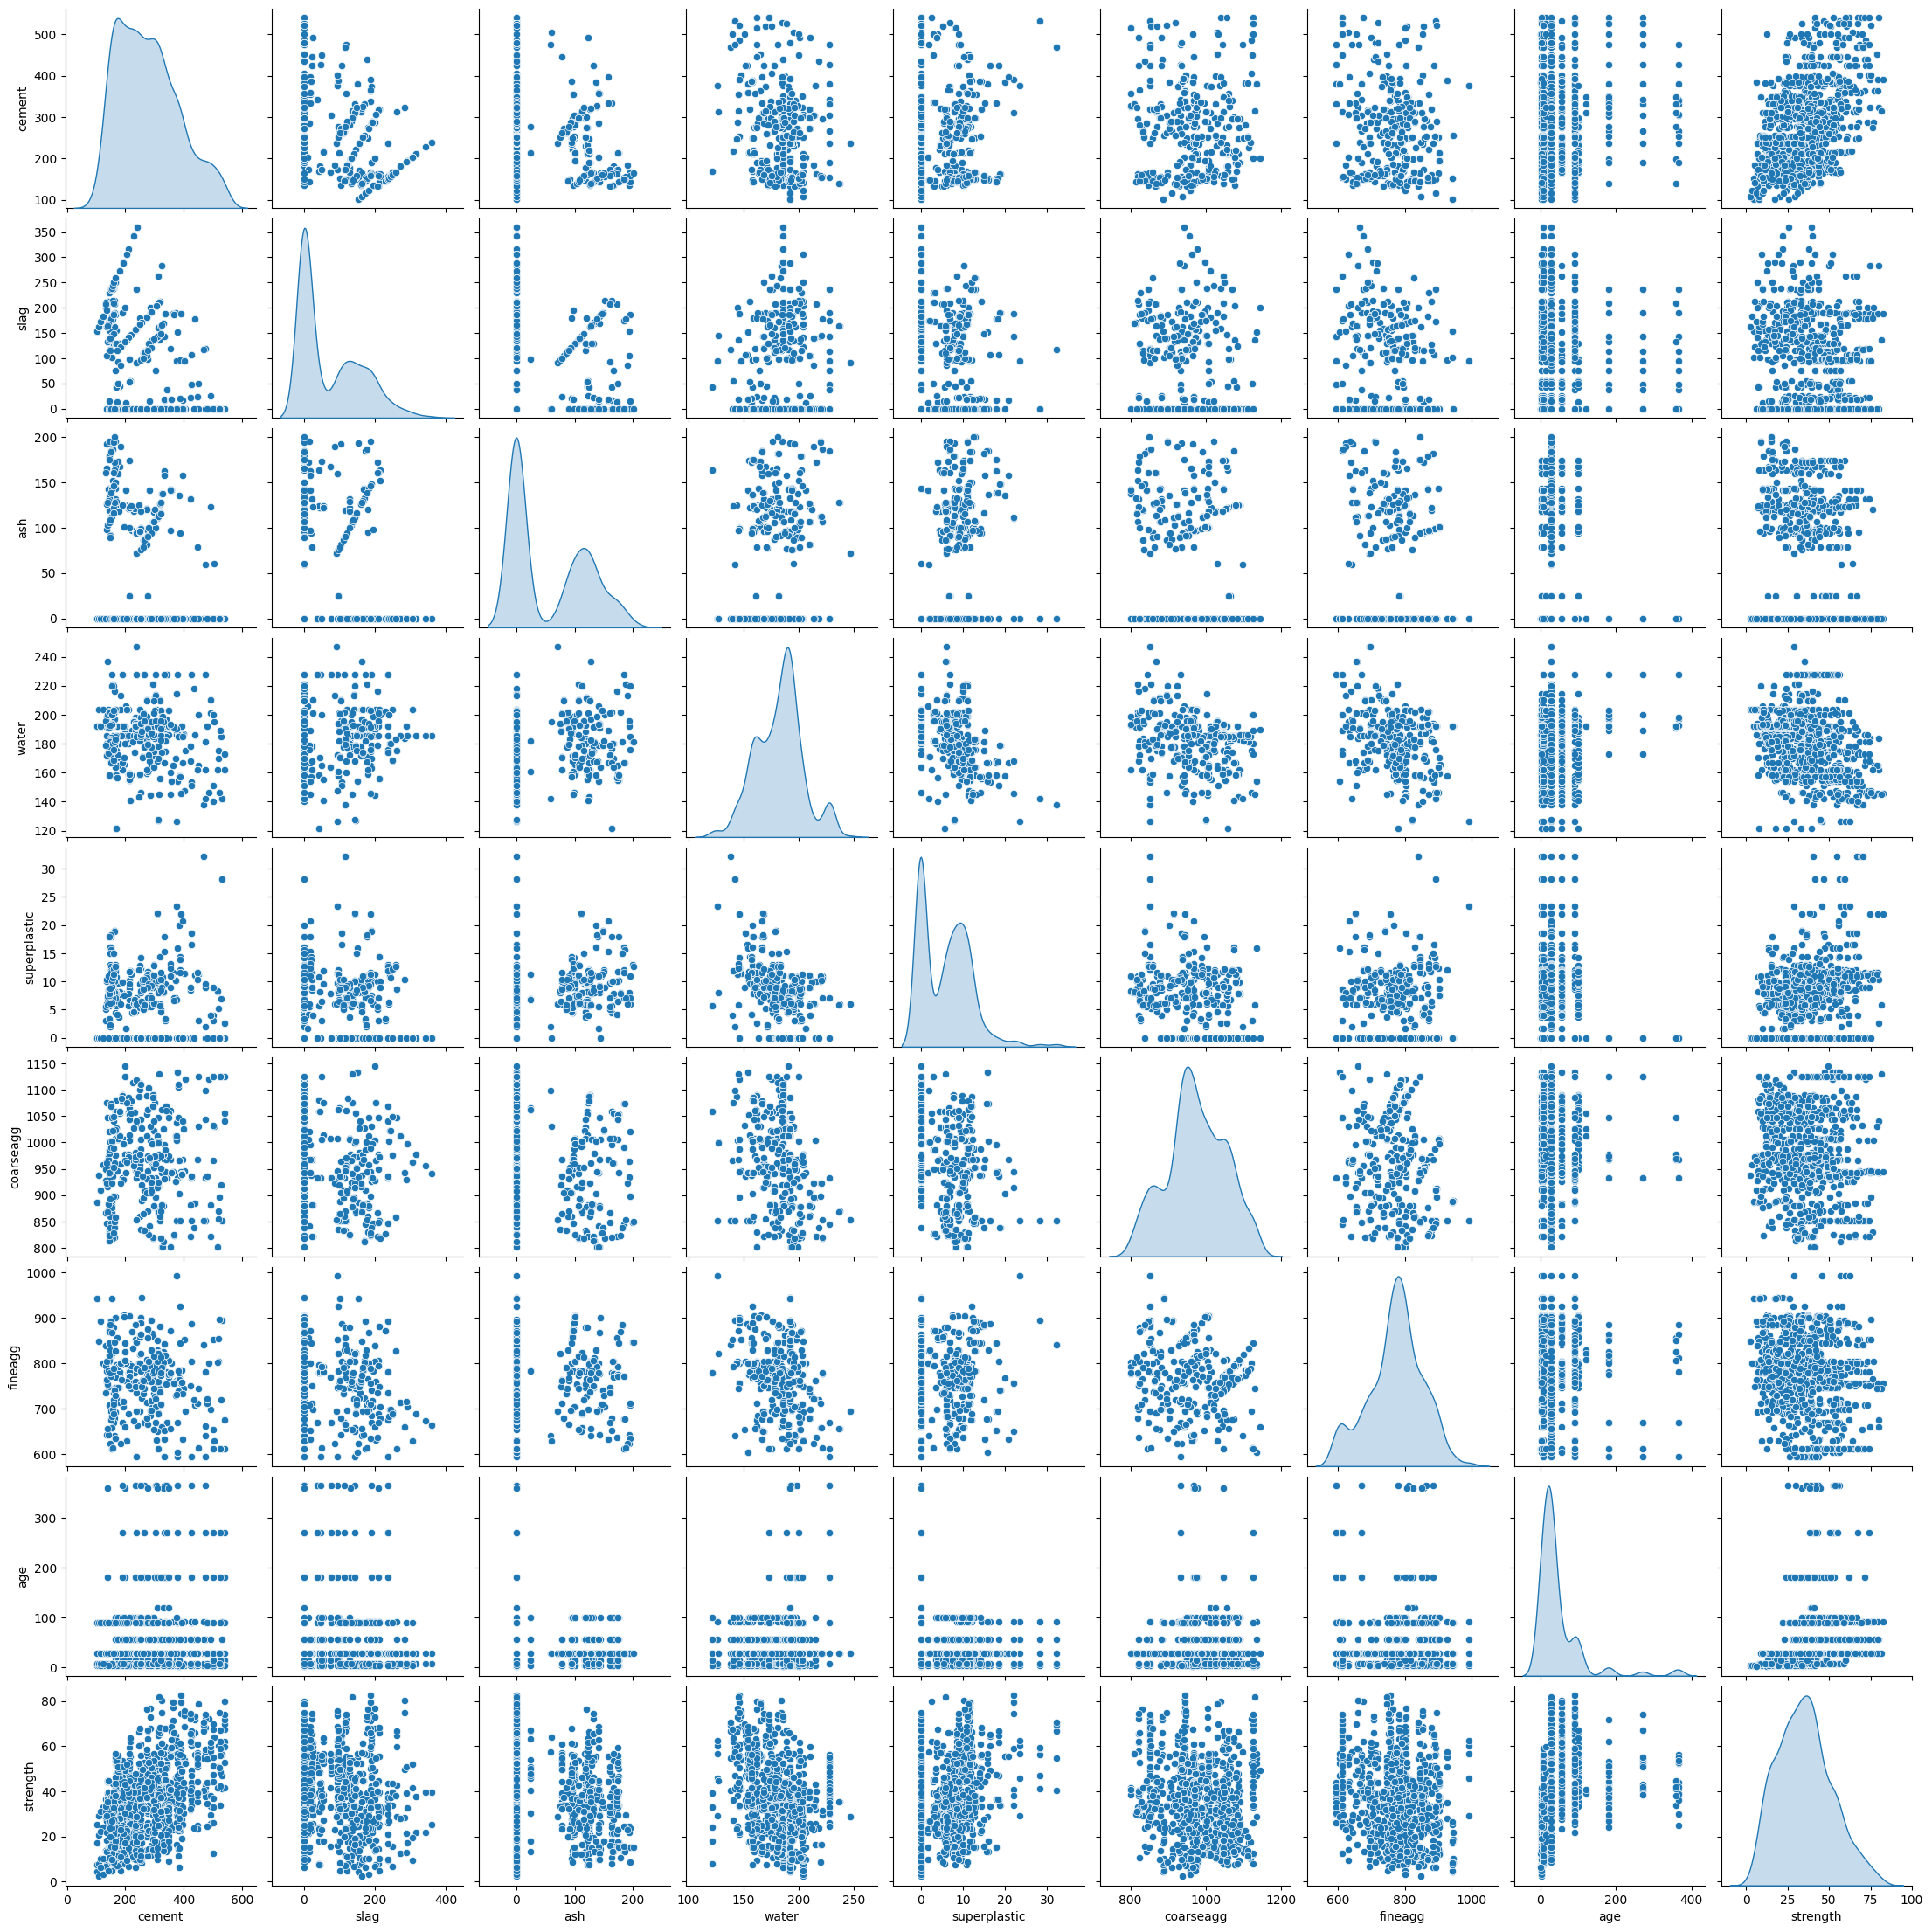

In [14]:
#plotting pairplot to know the relationship between features to target as well as within the features

sns.pairplot(concrete_df, diag_kind='kde')

### Insights:

1. As we increase fineagg substance, it looks like we require less water. Similar trend with water and superplastic
2. As cement increases strength seems increasing

<Axes: >

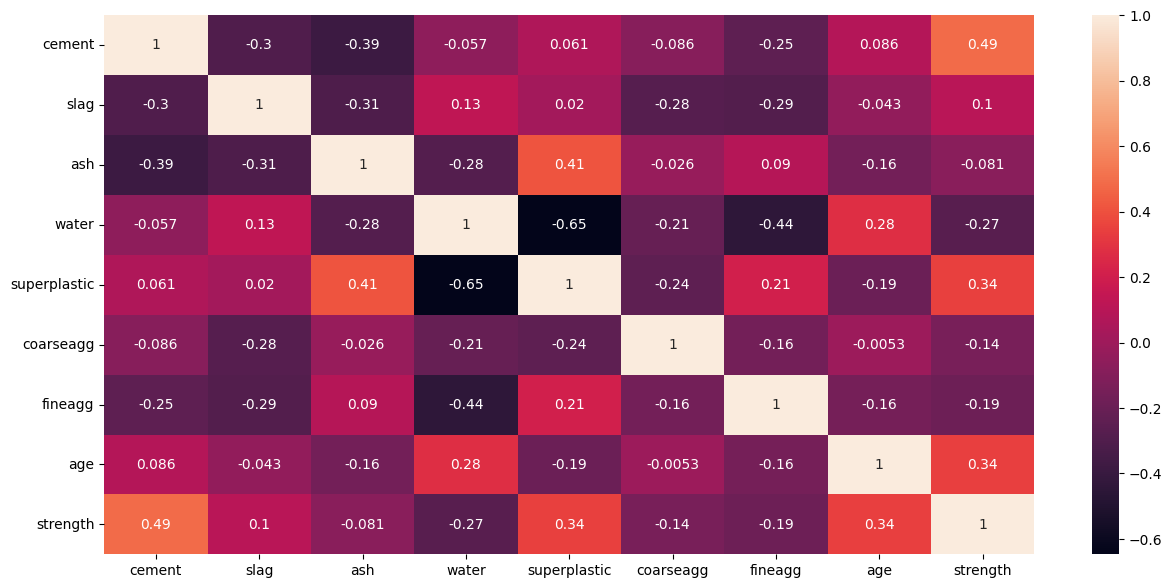

In [15]:
# Plotting corrleation using heat map
plt.figure(figsize=(15,7))
sns.heatmap(concrete_df.corr(), annot=True)

### Insights:

1. There is a positive correlation between cement and strength
2. age and superplastic has positive correlation with strength
3. There is a strong negative correlation between water and superplastic
4. There is a strong negative correlation between water and fineagg
5. ash and superplastic have positive correlation

# Feature Extraction

<p>As per the link <a href="https://www.cement.org/cement-concrete/how-concrete-is-made#:~:text=A%20properly%20designed%20mixture%20possesses,15%20to%2020%20percent%20water">concrete-mixture-proportions</a>, concrete is a mixture of paste and aggregates, or rocks. The paste, composed of cement and water. </p>

<p> The quality of the paste  determines the character of the concrete. The strength of the paste, in turn, depends on the ratio of water to cement. The water-cement ratio is the weight of the mixing water divided by the weight of the cement. High-quality concrete is produced by lowering the water-cement ratio <p>
    
<p> Hence, creating a new feature <b><i>water_to_cement_ratio</i></b> 

In [16]:
# Creating water cement ratio
concrete_df['water_cement_ratio'] = concrete_df['water'] / concrete_df['cement']
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.966767


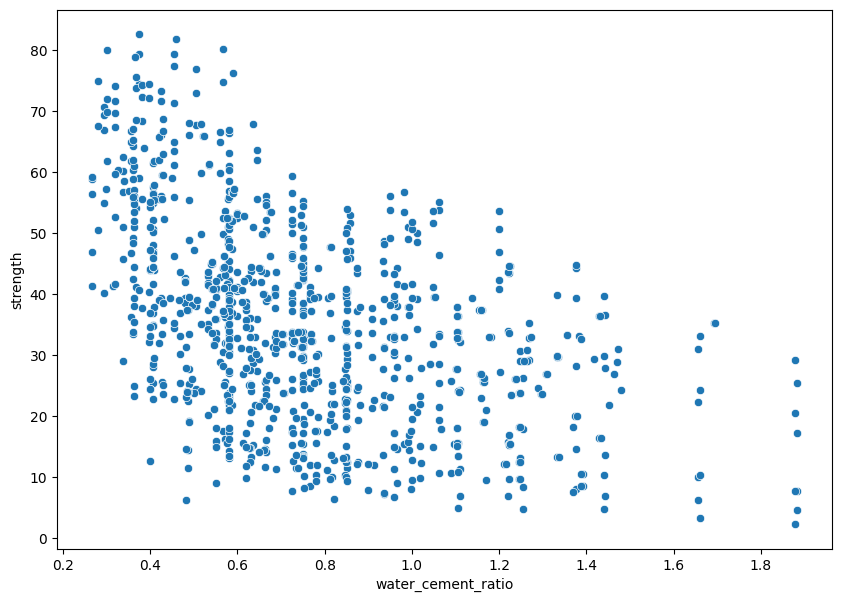

In [17]:
# plot the scatterplot between the newly created feature vs the target

plt.figure(figsize=(10,7))
sns.scatterplot(x='water_cement_ratio', y='strength',data=concrete_df)
plt.show()

### Insights:

`lesser the water_cement_ration, higher the strength`

In [18]:
# find the correlation between water_cement_ratio and strength

concrete_df['water_cement_ratio'].corr(concrete_df['strength'])

-0.48940084208454593

### Insights:

`As we have seen in the scatterplot, there is a negative correlation between water_cement_ratio and strength`

### Note: 
`As we don't know what features are more important at this moment, i am not going to drop any features right now`

# Split Data

In [19]:
#split the data in to train and test
X = concrete_df.drop('strength', axis=1)
y = concrete_df['strength']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

#### Find the outliers in xtrain and ytrain, treat those outliers and make the data ready for the model

In [20]:
# Function that return outliers
def get_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outlier_per_feature = ((df< Q1 - 1.5 * IQR) | (df > Q3 + 1.5* IQR)).sum() 
    return outlier_per_feature

#find the outliers in train data
outlier_per_feature = get_outliers(X_train)
outlier_per_feature

cement                 0
slag                   2
ash                    0
water                 13
superplastic           8
coarseagg              0
fineagg                4
age                   45
water_cement_ratio    14
dtype: int64

### Insights:

1. age has highest outliers
2. The newly extracted feature water_cement_ratio also has outliers


`Though age has outliers, i think they are valid values as age refers to the age of the concret. So we should keep the age values as is`

In [21]:
# Treat the outliers before fitting the model

columns_with_outliers = ['fineagg', 'slag', 'superplastic', 'water_cement_ratio', 'water']

#Function that treats the outliers 
def treat_outliers(df, columns_with_outliers, target_variable):
    if target_variable:
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        upper_wisker = q3 + 1.5 * iqr
        lower_wisker = q1 - 1.5 * iqr
        #Replace the lower-end outliers with lower wisker
        df[df < lower_wisker] = lower_wisker

         #Replace the upper-end outliers with upper wisker
        df[df > upper_wisker] = upper_wisker
    else:
        for col in columns_with_outliers:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            upper_wisker = q3 + 1.5 * iqr
            lower_wisker = q1 - 1.5 * iqr
            #Replace the lower-end outliers with lower wisker
            df[col] = np.where(df[col] < lower_wisker, lower_wisker, df[col])

             #Replace the upper-end outliers with upper wisker
            df[col] = np.where(df[col] > upper_wisker, upper_wisker, df[col])

In [22]:
# Treat outliers in X_train
treat_outliers(X_train, columns_with_outliers, False)
outlier_per_feature = get_outliers(X_train)
outlier_per_feature

cement                 0
slag                   0
ash                    0
water                  0
superplastic           0
coarseagg              0
fineagg                0
age                   45
water_cement_ratio     0
dtype: int64

In [23]:
# find if we have outliers in target train data
target_outliers = get_outliers(y_train)
target_outliers

9

### Insights:

`There are 10 outliers in target train data`

In [24]:
# Treat outliers in y_train
treat_outliers(y_train, None, True)
target_outliers = get_outliers(y_train)
target_outliers

0

# Simple Linear Regression

In [25]:
# Do the simple linear regression

simple_linreg = LinearRegression()
simple_linreg.fit(X_train, y_train)

train_r2 = simple_linreg.score(X_train, y_train)
test_r2 = simple_linreg.score(X_test, y_test)
mse = mean_squared_error(y_test, simple_linreg.predict(X_test))

# Create a dataframe with train, test scores and mean squared error
scores_df = pd.DataFrame(columns=['train score', 'test score', 'mean squared error'])
scores_df.loc['Simple Linear Regression'] = [train_r2, test_r2, mse]

scores_df

,train score,test score,mean squared error
Simple Linear Regression,0.596092,0.649155,100.936207


In [26]:
#Function to fit polynomial features on a given model and return the scores dataframe

def doPolynomialRegression(model, train_x, train_y, test_x, test_y, interaction_only, scores_df):
    # Iterate through degrees 2 to 5
    for degree in [2, 3, 4, 5]:
        poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only)
        
        #create train and test polynomial features of given degree
        X_train_poly = poly.fit_transform(train_x)
        X_test_poly = poly.fit_transform(test_x)

        #fit the model on train data with polynomial features
        model.fit(X_train_poly, train_y)
        y_predict = model.predict(X_test_poly)
        
        #calculate train,test scores and mean squared error
        train_r2 = model.score(X_train_poly, train_y)
        test_r2 = model.score(X_test_poly, test_y)
        mse = mean_squared_error(test_y, y_predict)
        
        #update the scores_df with calculated metrics
        scores_df.loc['Linear Regression With Degree {}'.format(degree)] = [train_r2, test_r2, mse]
        
    return scores_df
        

In [27]:
interaction_only = True

polynomial_regressor = LinearRegression()

# doing linear regression using polynomial features
doPolynomialRegression(polynomial_regressor,X_train, y_train, X_test, y_test, interaction_only, scores_df)

scores_df

,train score,test score,mean squared error
Simple Linear Regression,0.596092,0.649155,100.936207
Linear Regression With Degree 2,0.756876,0.725754,78.898968
Linear Regression With Degree 3,0.841438,0.661832,97.289082
Linear Regression With Degree 4,0.880893,-0.028122,295.784895
Linear Regression With Degree 5,0.899659,-235.183708,67948.748201


### Insights:

1. Since there exists non-linear relationship, we should use Polynomial features to avoid under fit. If we observe the metrics of simple linear regression, the model only accomidated 59% of the variance in the train data which is a clear indication of underfit.


2. The test R^2 value increased with degree of polynomial features up until the degree 3. The test R^2 of the models with degree greter than 3 dropped significantly which is an overfit scenario. Also the mean squared error for the models with degree greater than 3 increased significantly. 

<b>conclusion on complexity of the model interms of parameters: </b>

`We should use polynomial features with degree 3 as it has better train and test scores when compared to quadratic and simple linear regression models`

# Creating Model

In [28]:
# Create a dataframe to capture the results of each model and their metrics

result_df = pd.DataFrame(columns=['train score', 'test score', 'mean squared error', 'k-fold-cv mean', 'k-fold-cv std'])

# evaluate_models function does the following:

#    1. It takes list of models with train and test data.
#    2. iterates through each model
#    3. splits the train data into train and validate. 
#    4. fits the model on train data
#    5. does the k-fold cross validation on validation data
#    6. calculates the train, test R^2 values, mean squared error, k-fold cross validation mean and standard deviation
#    7. updates all the above calculated metrics in the results_df per model and returns the results_df

def evaluate_models(model_list):  
    # define kfold object
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    
    #iterate though list of models
    for model_obj in model_list:
        #get the model instance from model_obj
        model_instance = model_obj['model']
        #get train,test data from model_obj
        train_x = model_obj['xtrain']
        train_y = model_obj['ytrain']
        xtest = model_obj['xtest']
        ytest = model_obj['ytest']
        
        
        #split the train data in to train and validate
        xtrain, xval, ytrain, yval = train_test_split(train_x, train_y, test_size=0.2, random_state=7)
        
        #fit the model against train data
        model_instance.fit(xtrain, ytrain)
        
        # calculate train R^2
        train_r2 = model_instance.score(xtrain, ytrain)
        
        # perform kfold cross validation with validation data
        cv_result = cross_val_score (model_instance, xval, yval, cv=kfold)
        
        # calculate test R^2
        test_r2 = model_instance.score(xtest, ytest)
        
        #calulate mean sqaured error
        y_predict = model_instance.predict(xtest)
        mse = mean_squared_error(ytest, y_predict)

        #update the calculated metrics per model
        result_df.loc[model_obj['name']]= [train_r2, test_r2, mse, cv_result.mean(), cv_result.std() ]

    return result_df
        

In [29]:
# get_list_of_models function does the following:
#    1. Creates list of models with train,test data
#    2. For Regularization models like Ridge and lasso, it uses polynomial features with degree 3
#    3. It creates two sets of models for decision and ensemble models, with polynomial features and 
#     without polynomial features

def get_list_of_models(X_train, y_train, X_test, y_test):
    
    #Create polynomial features for X_train and X_test with degree 3
    poly = PolynomialFeatures(degree=3, interaction_only=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    model_list = [
        
        # Regularization models with polynomial features of degree 3
        
        {'model': Ridge(alpha=.3, random_state=7), 'name': 'Ridge Regression With Degree 3',
                 'xtrain': X_train_poly, 'ytrain': y_train, 'xtest': X_test_poly, 'ytest': y_test },
        {'model': Lasso(alpha=0.2, random_state=7), 'name': 'Lasso Regression With Degree 3',
                 'xtrain': X_train_poly, 'ytrain': y_train, 'xtest': X_test_poly, 'ytest': y_test },
        
        # Decision Tree and ensemble models with polynomial features of degree 3
        
        {'model': DecisionTreeRegressor(random_state=7), 'name': 'DecisionTree Regressor With polynomial',
                 'xtrain': X_train_poly, 'ytrain': y_train, 'xtest': X_test_poly, 'ytest': y_test },
        {'model': BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=7), n_jobs=4, random_state=7), 
                 'name': 'Bagging Regressor With polynomial', 
                 'xtrain': X_train_poly, 'ytrain': y_train, 'xtest': X_test_poly, 'ytest': y_test },
        {'model': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=7), random_state=7), 
                 'name': 'AdaBoost Regressor With polynomial', 
                 'xtrain': X_train_poly, 'ytrain': y_train, 'xtest': X_test_poly, 'ytest': y_test },
        {'model': GradientBoostingRegressor(random_state=7), 'name': 'GradientBoost Regressor With polynomial', 
                 'xtrain': X_train_poly, 'ytrain': y_train, 'xtest': X_test_poly, 'ytest': y_test },
        {'model': RandomForestRegressor(random_state=7), 'name': 'RandomForest Regressor With polynomial', 
                 'xtrain': X_train_poly, 'ytrain': y_train, 'xtest': X_test_poly, 'ytest': y_test },
        
        # Decision Tree and ensemble models without polynomial features
        
        {'model': DecisionTreeRegressor(random_state=7), 'name': 'Decision Tree Regressor',
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test },
        {'model': BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=7), n_jobs=4, random_state=7), 
                 'name': 'Bagging Regressor', 
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test },
        {'model': AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=7), random_state=7), 
                 'name': 'AdaBoost Regressor', 
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test },
        {'model': GradientBoostingRegressor(random_state=7), 'name': 'GradientBoost Regressor', 
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test },
        {'model': RandomForestRegressor(random_state=7), 'name': 'RandomForest Regressor', 
                 'xtrain': X_train, 'ytrain': y_train, 'xtest': X_test, 'ytest': y_test }
    ]
    
    return model_list

In [30]:
#get the list of models
model_list = get_list_of_models(X_train, y_train, X_test, y_test)
#evaluate each model
result_df = evaluate_models(model_list)

#look for metrics of each model
result_df

,train score,test score,mean squared error,k-fold-cv mean,k-fold-cv std
Ridge Regression With Degree 3,0.849993,0.664034,96.655507,-21.465812,19.641791
Lasso Regression With Degree 3,0.801474,0.715780,81.768624,-0.178726,1.863851
DecisionTree Regressor With polynomial,0.998595,0.851148,42.823996,0.632497,0.192964
Bagging Regressor With polynomial,0.976335,0.883496,33.517617,0.755199,0.103326
AdaBoost Regressor With polynomial,0.996539,0.878090,35.072743,0.747897,0.136611
GradientBoost Regressor With polynomial,0.971336,0.902962,27.917339,0.767663,0.161667
RandomForest Regressor With polynomial,0.982960,0.898233,29.277782,0.783177,0.123138
Decision Tree Regressor,0.998595,0.791071,60.107812,0.471607,0.386609
Bagging Regressor,0.977047,0.876294,35.589463,0.742791,0.129222
AdaBoost Regressor,0.995719,0.867887,38.008175,0.743857,0.125180


### Unlike Linear models, DecisionTree and other Ensemble Models considers interaction terms. We don't need to specify external interaction terms. If we look at the above result dataframe, there is no much impact adding polynomial features on Decisiontree and other ensemble models. 

### I am going to use GradientBoostingRegressor and RandomForestRegressor from here on. Hence I am going to ignore polynomial features as more number of features increases the complexity of the model. 

# Feature Selection

#### Recursive Feauture Elimination - RandomForestRegressor

In [31]:
# Recursive Feature Elimination

kfold = KFold(n_splits=10, shuffle=True, random_state=15)

rf_rfecv = RFECV(estimator=RandomForestRegressor(random_state=7), step=1, cv=kfold)
rf_rfecv.fit(X_train, y_train)
print('Optimal number of features: {}'.format(rf_rfecv.n_features_))

Optimal number of features: 9


In [32]:
# Function to plot feature vs importance
def plot_feature_vs_importance(features, importances, title):
    feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    
    plt.figure(figsize=(15, 7))
    plt.barh(y=feature_importance_df['feature'], width=feature_importance_df['importance'], color='#1976D2')
    plt.title(title, fontsize=20, fontweight='bold', pad=20)
    plt.xlabel('Importance', fontsize=14, labelpad=20)
    plt.show()


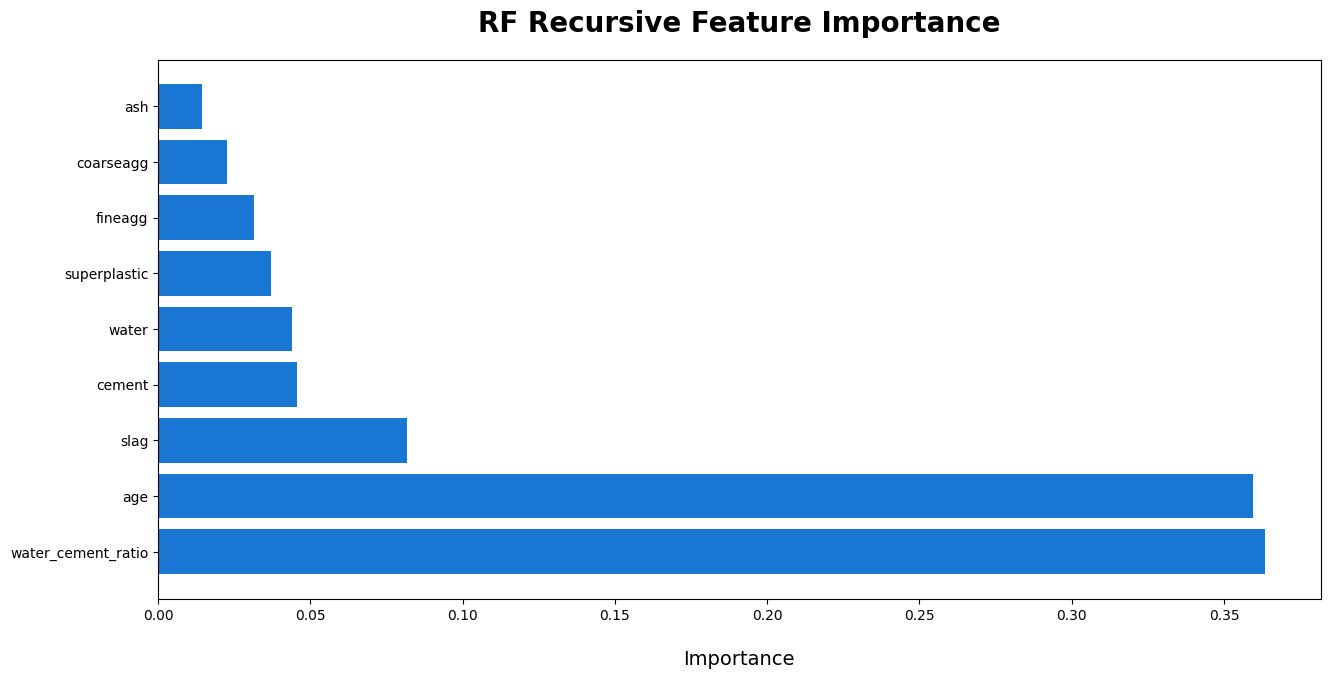

In [33]:
# Find the important features using recursive feature elimination and plot feature vs importance graph
rf_rfe_importances = rf_rfecv.estimator_.feature_importances_
rf_important_features = X_train.columns[np.where(rf_rfecv.support_ == True)[0]]
plot_feature_vs_importance(rf_important_features, rf_rfe_importances, 'RF Recursive Feature Importance')

### Insights:

`As per RandomForestRegressor, all 9 features are important in predicting concrete strength`

#### Recursive Feauture Elimination - GradientBoostingRegressor

In [34]:
# Feature selection using recursive feature elimination technique

kfold = KFold(n_splits=10, shuffle=True, random_state=15)

gbr_rfecv = RFECV(estimator=GradientBoostingRegressor(random_state=7), step=1, cv=kfold)
gbr_rfecv.fit(X_train, y_train)
print('Optimal number of features: {}'.format(gbr_rfecv.n_features_))

Optimal number of features: 9


[0.03694627 0.08469846 0.00418984 0.03777369 0.05661391 0.01286133
 0.0299865  0.39027688 0.34665313]


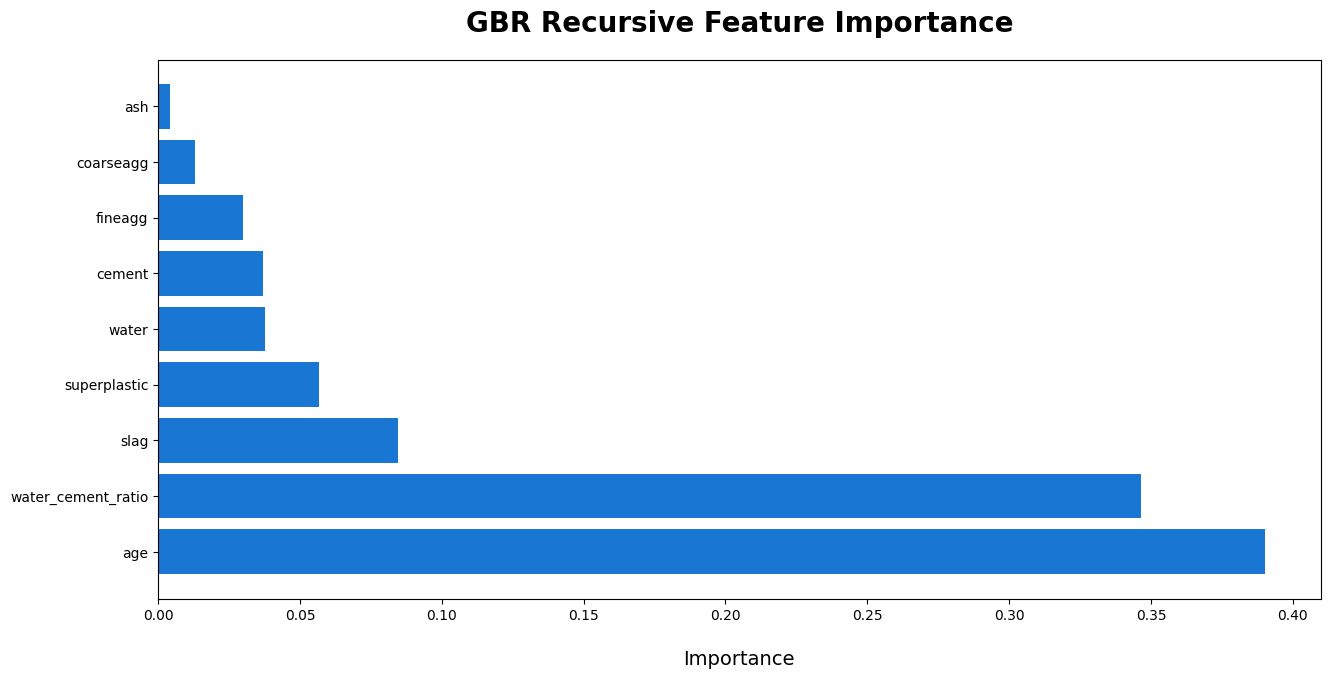

In [35]:
# Find the important features using recursive feature elimination and plot feature vs importance graph
gbr_rfe_importances = gbr_rfecv.estimator_.feature_importances_
gbr_important_features = X_train.columns[np.where(gbr_rfecv.support_ == True)[0]]

print(gbr_rfe_importances)
plot_feature_vs_importance(gbr_important_features, gbr_rfe_importances, 'GBR Recursive Feature Importance')

### Insights:

`As per GradientBoostingRegressor, ash and coarseagg doesn't seem contributing in predicting the concrete strength`

# Hyper Parameter Tuning


#### Using RandomForest

In [36]:
# create columns array that can be dropped as per RecursiveFeatureElimination using RandomForestRegressor
columns_to_drop = X_train.columns[np.where(rf_rfecv.support_ == False)[0]]
columns_to_drop

Index([], dtype='object')

In [37]:
# Function to split original data into train and test, drop the features that are not important as per
# Recursive Feature Elimination
def split_data_train_test(df, columns_to_drop):
    columns_to_drop.append('strength')
    X = concrete_df.drop(columns_to_drop, axis=1)
    y = concrete_df['strength']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)
    
    return X_train, y_train, X_test, y_test

In [38]:
X_train, y_train, X_test, y_test = split_data_train_test(concrete_df,[])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((804, 9), (804,), (201, 9), (201,))

#### Find the outliers in xtrain and ytrain, treat those outliers and make the data ready for the model

In [39]:
# Get the outliers in train
def print_outliers_in_train(X_train, y_train):
    outliers_in_xtrain = get_outliers(X_train)
    outliers_in_ytrain = get_outliers(y_train)
    print('Outliers in xtrain: ')
    print(outliers_in_xtrain)
    print('\n')
    print('Outliers in ytrain: ')
    print(outliers_in_ytrain)

print_outliers_in_train(X_train, y_train)

Outliers in xtrain: 
cement                 0
slag                   2
ash                    0
water                 13
superplastic           8
coarseagg              0
fineagg                4
age                   45
water_cement_ratio    14
dtype: int64


Outliers in ytrain: 
9


In [40]:
# treat outliers in X_train, X_val and y_train

def treat_outliers_in_train(X_train, y_train):
    treat_outliers(X_train, ['slag', 'water', 'superplastic','fineagg', 'water_cement_ratio'], False)
    treat_outliers(y_train, None, True)
    

treat_outliers_in_train(X_train, y_train)

#### Tune RandomForestModel using RandomizedSearchCV

In [41]:
# Construct the parameter distribution for RandomSearchCV with RandomForestRegressor parameters
rs_params_dist = {   
                'max_depth': randint(3,8),
                'max_features': ['auto', 'sqrt'],
                'bootstrap': [True],
                'criterion': ['mse'],
                'n_estimators': randint(100, 300)
                }

rf_rs_cv = RandomizedSearchCV(RandomForestRegressor(random_state=7), 
                              param_distributions=rs_params_dist, 
                              n_iter=20, cv=10, 
                              n_jobs=4,
                              random_state=7)
# fit the train data
rf_rs_cv.fit(X_train, y_train)

ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'absolute_error', 'squared_error', 'friedman_mse'}. Got 'mse' instead.

--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'squared_error', 'poisson', 'absolute_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'squared_error', 'absolute_error', 'poisson'}. Got 'mse' instead.

--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jainh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'poisson', 'absolute_error', 'friedman_mse'}. Got 'mse' instead.


In [ ]:
# Find the best params
rf_rs_cv.best_params_

In [ ]:
# Create final result dataframe with train, test and mean sequared error metrics per model
final_results_df = pd.DataFrame(columns=['train_score', 'test_score', 'mean_squared_error'])

y_predict = rf_rs_cv.predict(X_test)# It will use the model best hyper parameters when doing predict


final_results_df.loc['RandomForest_With_RSCV'] = [
                                                rf_rs_cv.score(X_train, y_train),
                                                rf_rs_cv.score(X_test, y_test),
                                                mean_squared_error(y_test, y_predict)
                                            ]

final_results_df

#### Using GradientBoost

In [ ]:
# Look For columns that needs to be dropped as per RecursiveFeatureElimination using GradientBoostingRegressor
columns_to_drop = X_train.columns[np.where(gbr_rfecv.support_ == False)[0]]
columns_to_drop

In [ ]:
#Split original data in to train and test, drop columns as per RecursiveFeatureElimination using GradientBoostingRegressor
X_train, y_train,X_test, y_test = split_data_train_test(concrete_df,['ash', 'coarseagg'])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#### Find the outliers in xtrain and ytrain, treat those outliers and make the data ready for the model

In [ ]:
# Print outliers in train data
print_outliers_in_train(X_train, y_train)

In [ ]:
# treat Outlier in train data
treat_outliers_in_train(X_train, y_train)

In [ ]:
# Construct the parameter distribution for RandomSearchCV for GradientboostingRegressor
rs_params_dist = {
                    'loss':['ls', 'lad'],
                    'learning_rate': uniform(0.001,1.00),
                    'criterion': ['friedman_mse', 'mse'],
                    'n_estimators': randint(100, 300),
                    'max_depth': randint(3,7)
                }


gb_rs_cv = RandomizedSearchCV(GradientBoostingRegressor(random_state=7), 
                              param_distributions=rs_params_dist, 
                              n_iter=20, cv=10, 
                              n_jobs=4,
                              random_state=7)
#fit the train data
gb_rs_cv.fit(X_train, y_train)


In [ ]:
#Find the best params
gb_rs_cv.best_params_

In [ ]:
y_predict = gb_rs_cv.predict(X_test)# It will use the model with best hyper parameters when doing predict


final_results_df.loc['GradientBoost_With_RSCV'] = [
                                                gb_rs_cv.score(X_train, y_train),
                                                gb_rs_cv.score(X_test, y_test),
                                                mean_squared_error(y_test, y_predict)
                                            ]

final_results_df

## Significance Of R2

<ul>
    <li> R2 explains the amount of variance explained in the data. In otherword, how well the model fit the data. It will have values between 0 to 1</li>
    <li> Higher value of R2 means, more variance is accounted by the model. In other words, if the model has higher R2 value (closer to 1) then the model performs good in predicting the target,  in our case the concrete strength. If the model has low R2 value that model won't be a good predictor of target </li>

</ul>   

#### GradientBoostRegressor has R2 value as 94% for test data.  So our final model is going to be GradientBoostRegressor.

# Inference about the data analysis

In [ ]:
def compute_95_percent_confidence_interval(model):
    # get the mean validation score from cv_results of best index
    mean_validation_score = model.cv_results_['mean_test_score'][model.best_index_]
    # get the standard deviation of validation from cv_results of best index
    standard_deviation_validation = model.cv_results_['std_test_score'][model.best_index_]
    z = 1.96 # the z-socre for 95% confidence interval is 1.96
    confidence_interval = '[{}, {}]'.format(
                                    (mean_validation_score - z * standard_deviation_validation),
                                    (mean_validation_score + z * standard_deviation_validation)
                                    )
    return confidence_interval

In [ ]:
_95_percent_confidence_interval = compute_95_percent_confidence_interval(gb_rs_cv)
_95_percent_confidence_interval

`We did exploratory data analysis (EDA), identified the outliers in the data, cleaned the data to make it ready for the model.` 

`During EDA, we identified that some of the features could be a good predictors of the target based on thier relationship (We identified this relationship by using scatter plots and correlation functions). For instance, water_cement_ratio feature has a negative correlation with target variable and we knew that it will be a good predictor of concrete strength and we found that our initial inference is true on the final model.`

`The final model has accuracy between 87% to 94% with a confidence of 95%.`

# Recommendations:

Based on our best model, we can make the following recommendations

1. water_cement_ratio, age, slag, superplastic, water, cement, fineagg are best features with which we can predict concrete strength

2. We can ignore ash optional substance and coarseagg as they don't seem adding much value towards concrete strength





In [ ]:
gb_rs_cv.best_estimator_

In [ ]:
with open('concrete_strength_trained_model.pkl', 'wb') as m:
    pickle.dump(gb_rs_cv.best_estimator_, m)

In [ ]:
with open('concrete_strength_trained_model.pkl', 'rb') as m:
    loaded_model = pickle.load(m)
loaded_model    